# Práctica 2. Árboles de decision y método KNN

## Ejercicio 1. Árboles de decisión.

Un grupo de pescadores quiere utilizar un árbol de decisión para decidir de forma automática
si salir a pescar o no en función de diversas variables: previsión, temperatura, marea y viento.
La siguiente tabla presenta los ejemplos que se utilizarán para construir el árbol de decisión.

A continuación, resuelva los siguientes apartados:

### 1.1. Realice un script (o un Jupyter notebook) de Python en que se genere el modelo basado en un árbol de decisión mediante funciones de alto nivel de la librería scikit-learn.

In [56]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = {
    'Prevision': ['nublado', 'lluvioso', 'nublado', 'lluvioso', 'soleado', 'lluvioso', 'soleado', 'soleado', 'nublado', 'soleado'],
    'Temperatura': ['media', 'alta', 'baja', 'media', 'alta', 'baja', 'baja', 'alta', 'baja', 'media'],
    'Marea': ['baja', 'media', 'media', 'alta', 'alta', 'baja', 'alta', 'alta', 'media', 'baja'],
    'Viento': ['medio', 'debil', 'fuerte', 'fuerte', 'debil', 'medio', 'fuerte', 'medio', 'fuerte', 'debil'],
    'Pescar': ['si', 'si', 'no', 'si', 'no', 'si', 'no', 'no', 'no', 'si']
}

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Prevision'] = label_encoder.fit_transform(df['Prevision'])
df['Temperatura'] = label_encoder.fit_transform(df['Temperatura'])
df['Marea'] = label_encoder.fit_transform(df['Marea'])
df['Viento'] = label_encoder.fit_transform(df['Viento'])
df['Pescar'] = label_encoder.fit_transform(df['Pescar'])

X = df.drop('Pescar', axis=1)
Y = df['Pescar']

clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X, Y)


DecisionTreeClassifier(criterion='entropy', random_state=0)

#### a) ¿Qué característica se ha seleccionado como nodo raíz? ¿Por qué cree que se ha seleccionado esa característica?

In [57]:
# Obtiene el índice de la característica seleccionada como nodo raíz
root_feature_index = clf.tree_.feature[0]

# Muestra el nombre de la característica seleccionada
root_feature_name = df.columns[root_feature_index]
print(f"La característica seleccionada como nodo raíz es: {root_feature_name}")

La característica seleccionada como nodo raíz es: Temperatura


#### b) Indique si existe algún valor de alguna característica que permita salir a pescar independientemente del resto de valores de las demás características.
Si el valor de la caracteristica "Temperatura" es "" permite salir a pescar independientemente del resto de valores de las demás características.

#### c) ¿Existe algún atributo que no influya en la decisión de salir a pescar o no?
Los atributos que no influyen para salir a pescar son "Marea" y "Viento".

#### d) Adjunte de forma gráfica el árbol de decisión que se ha generado.

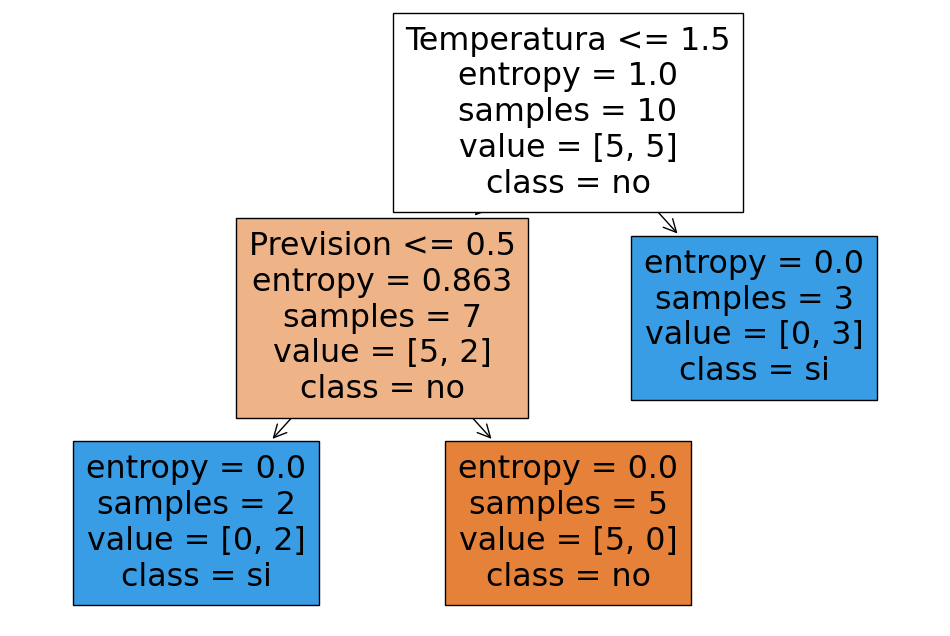

In [58]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names= list(label_encoder.classes_))
plt.show()

### 1.2 En la siguiente tabla se muestran nuevos datos que se van a utilizar para evaluar el modelo creado en el apartado anterior. Realice un nuevo script (o un Jupyter notebook) en el que se obtenga el porcentaje de acierto de los nuevos datos aplicando el modelo que se ha generado. De acuerdo con el dato de porcentaje obtenido, ¿Cree que el modelo será útil para el grupo de pescadores?

In [59]:
data2 = {
    'Prevision': ['soleado', 'nublado', 'nublado', 'soleado', 'lluvioso', 'lluvioso', 'nublado', 'soleado', 'nublado', 'lluvioso'],
    'Temperatura': ['alta', 'baja', 'media', 'alta', 'media', 'media', 'baja', 'alta', 'media', 'baja'],
    'Marea': ['media', 'media', 'baja', 'alta', 'baja', 'alta', 'media', 'alta', 'baja', 'media'],
    'Viento': ['debil', 'medio', 'medio', 'fuerte', 'medio', 'debil', 'medio', 'debil', 'medio', 'fuerte'],
    'Pescar': ['no', 'no', 'si', 'no', 'si', 'si', 'si', 'no', 'si', 'si']
}

df2 = pd.DataFrame(data2)

label_encoder2 = LabelEncoder()
df2['Prevision'] = label_encoder2.fit_transform(df2['Prevision'])
df2['Temperatura'] = label_encoder2.fit_transform(df2['Temperatura'])
df2['Marea'] = label_encoder2.fit_transform(df2['Marea'])
df2['Viento'] = label_encoder2.fit_transform(df2['Viento'])
df2['Pescar'] = label_encoder2.fit_transform(df2['Pescar'])

# Separar características y etiquetas
X_test = df2.drop('Pescar', axis=1)
y_test = df2['Pescar']

# Hacer predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en los nuevos datos: {accuracy}')

Precisión del modelo en los nuevos datos: 0.9


El modelo tiene apenas un 10% de error en sus predicciones, por lo tanto, es un buen modelo que los pescadores podrían usar.

### 1.3. Genere en un nuevo script (o un Jupyter notebook) el modelo basado en árbol de decisión utilizando los datos del ejercicio 3 de la práctica 1 (regresión logística). Adjunte en la memoria una imagen del modelo. De acuerdo con el modelo generado, ¿cuál es el atributo que presenta una menor entropía?

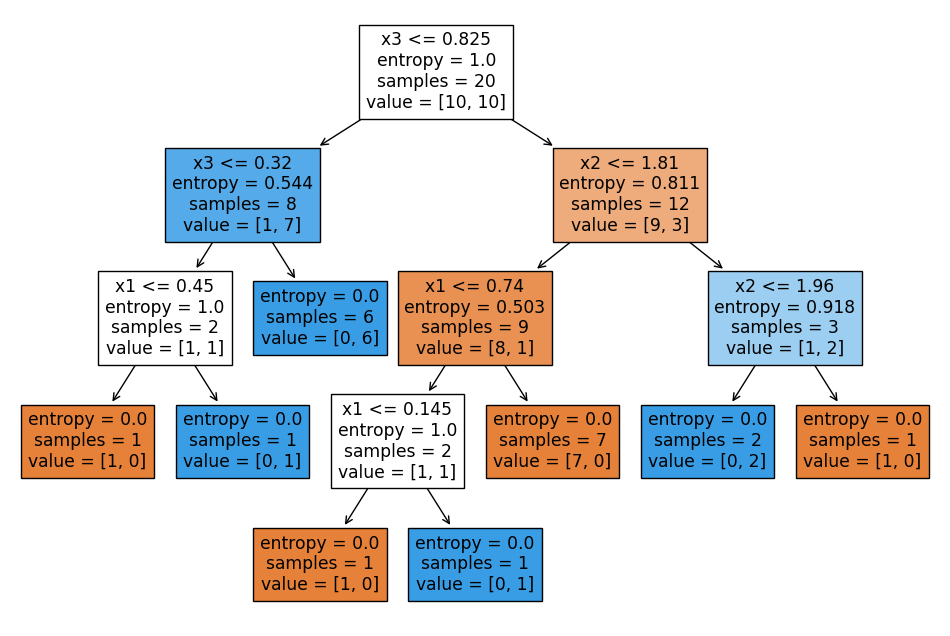

In [60]:
# Dataset del ejercicio 3 practica 1.
x1 = np.array([0.89, 0.41, 0.04, 0.75, 0.15, 0.14, 0.61, 0.25, 0.32, 0.40, 1.26, 1.68, 1.23, 1.46, 1.38, 1.54, 1.99, 1.76, 1.98, 1.23])
x2 = np.array([0.41, 0.39, 0.61, 0.17, 0.19, 0.09, 0.32, 0.77, 0.23, 0.74, 1.53, 1.05, 1.76, 1.60, 1.86, 1.99, 1.93, 1.41, 1.00, 1.54])
x3 = np.array([0.69, 0.82, 0.83, 0.29, 0.31, 0.52, 0.33, 0.83, 0.81, 0.56, 1.21, 1.22, 1.33, 1.10, 1.75, 1.75, 1.54, 1.34, 1.83, 1.55])

X_ej3 = np.vstack((x1,x2,x3)).T
Y_ej3 = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

clf3 = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
clf3.fit(X_ej3, Y_ej3)

features = ['x1', 'x2', 'x3']

plt.figure(figsize=(12, 8))
tree.plot_tree(clf3, filled=True, feature_names=features)
plt.show()

El atributo que presenta menor entropia es x3 debido a que es el nodo raíz del árbol.

### 1.4. A continuación calcule el error en porcentaje que presenta el modelo sobre los datos de entrenamiento. ¿Por qué cree que existe esa diferencia con respecto a utilizar un modelo basado en regresión logística?

In [61]:
# Hacer predicciones en los datos de prueba
y_pred_ej3 = clf3.predict(X_ej3)

accuracy_ej3 = accuracy_score(Y_ej3, y_pred_ej3)
print(f'Error en porcentaje del modelo sobre los datos de entrenamiento: {1.0-accuracy_ej3}')

Error en porcentaje del modelo sobre los datos de entrenamiento: 0.0


## Ejercicio 2. Método KNN

### 2.1. Realice un script (o un Jupyter notebook) en el que se carguen los datos de entrenamiento y se representen en una figura. Atendiendo a lo que observa, ¿Cree que el método KNN es el más apropiado para generar el modelo de clasificación? En caso afirmativo justifique su respuesta y en caso negativo, proponga otro método de los que se han estudiado en clase y justifique qué ventaja presentaría con respecto al método KNN.

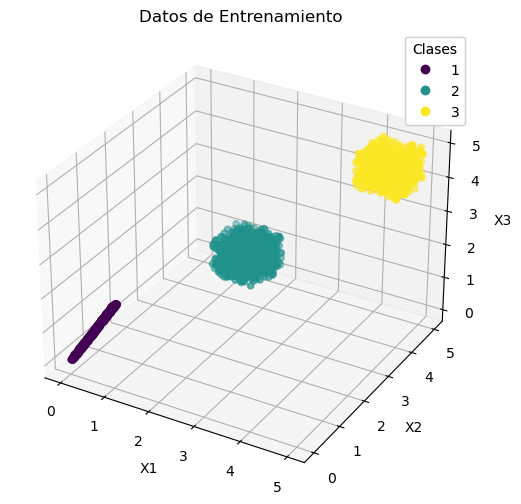

In [62]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('data.csv')

# Extraer las columnas de interés
X_1 = data['X1']
X_2 = data['X2']
X_3 = data['X3']
Y_data = data['Y']

# Crear una figura para visualizar los datos
plt.figure(figsize=(8, 6))

# Graficar los datos en un gráfico de dispersión en 3D
ax = plt.axes(projection='3d')
scatter = ax.scatter(X_1, X_2, X_3, c=Y_data, cmap='viridis', marker='o', label='Datos de Entrenamiento')


# Etiquetas de los ejes y título
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Datos de Entrenamiento')

# Mostrar la leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()

### 2.2. Genere el modelo KNN utilizando las funciones de alto nivel de la librería scikit-learn con el conjunto de ejemplos de entrenamiento proporcionados y con los argumentos que considere oportunos para clasificar el vector x = (2, 1, 3). ¿A qué clase pertenece si se tiene en cuenta cómo están distribuidas las clases? Argumente su respuesta.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

X_data = data[['X1', 'X2', 'X3']]

# Crear y ajustar el modelo KNN (puedes ajustar el valor de K según tus necesidades)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_data, Y_data)

# Vector a clasificar
x = np.array([[2, 1, 3]])

# Realizar la predicción
predicted_class = knn_model.predict(x)

# Imprimir la clase predicha
print(f"La clase predicha para el vector x es: {predicted_class[0]}")

La clase predicha para el vector x es: 2


/home/danikg/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 2.3. Calcule la matriz de covarianza de cada una de las clases utilizando el conjunto de datos de entrenamiento. Atendiendo a los valores de las matrices de covarianza, ¿Observa alguna diferencia significativa entre clases? Razone su respuesta.

In [65]:
# Dividir los datos en subconjuntos según las clases
class_1_data = data[data['Y'] == 1]
class_2_data = data[data['Y'] == 2]
class_3_data = data[data['Y'] == 3]

# Seleccionar solo las columnas de características (X)
class_1_features = class_1_data[['X1', 'X2', 'X3']]
class_2_features = class_2_data[['X1', 'X2', 'X3']]
class_3_features = class_3_data[['X1', 'X2', 'X3']]

# Calcular la matriz de covarianza para cada clase
cov_matrix_class_1 = np.cov(class_1_features, rowvar=False)
cov_matrix_class_2 = np.cov(class_2_features, rowvar=False)
cov_matrix_class_3 = np.cov(class_3_features, rowvar=False)

print("Matriz de covarianza para la clase 1:")
print(cov_matrix_class_1)

print("\nMatriz de covarianza para la clase 2:")
print(cov_matrix_class_2)

print("\nMatriz de covarianza para la clase 3:")
print(cov_matrix_class_3)

Matriz de covarianza para la clase 1:
[[ 8.39372401e-02 -3.57412586e-05  1.68031034e-01]
 [-3.57412586e-05  3.31406891e-03 -1.39023963e-04]
 [ 1.68031034e-01 -1.39023963e-04  3.37225571e-01]]

Matriz de covarianza para la clase 2:
[[ 0.08205191  0.00038686  0.00622877]
 [ 0.00038686  0.08339157 -0.00168322]
 [ 0.00622877 -0.00168322  0.08195208]]

Matriz de covarianza para la clase 3:
[[ 0.08500606 -0.00046063 -0.00308014]
 [-0.00046063  0.08616262 -0.00615273]
 [-0.00308014 -0.00615273  0.08323363]]
